# Objetivo:
- Lidar com Missing Values
- Excluir Atributos e Instâncias com muitos missing values


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

---

In [29]:
df = pd.read_csv("../../Database/101_Database.csv", encoding = 'latin-1')

## Pegando a porcentagem de missing values para os Atributos

In [30]:
missingValuesColumns = df.isna().sum()

In [31]:
missingValuesColumnsPercentage = missingValuesColumns / df.shape[0]

In [32]:
missingValuesColumnsPercentage.sort_values(ascending=False, inplace=True)

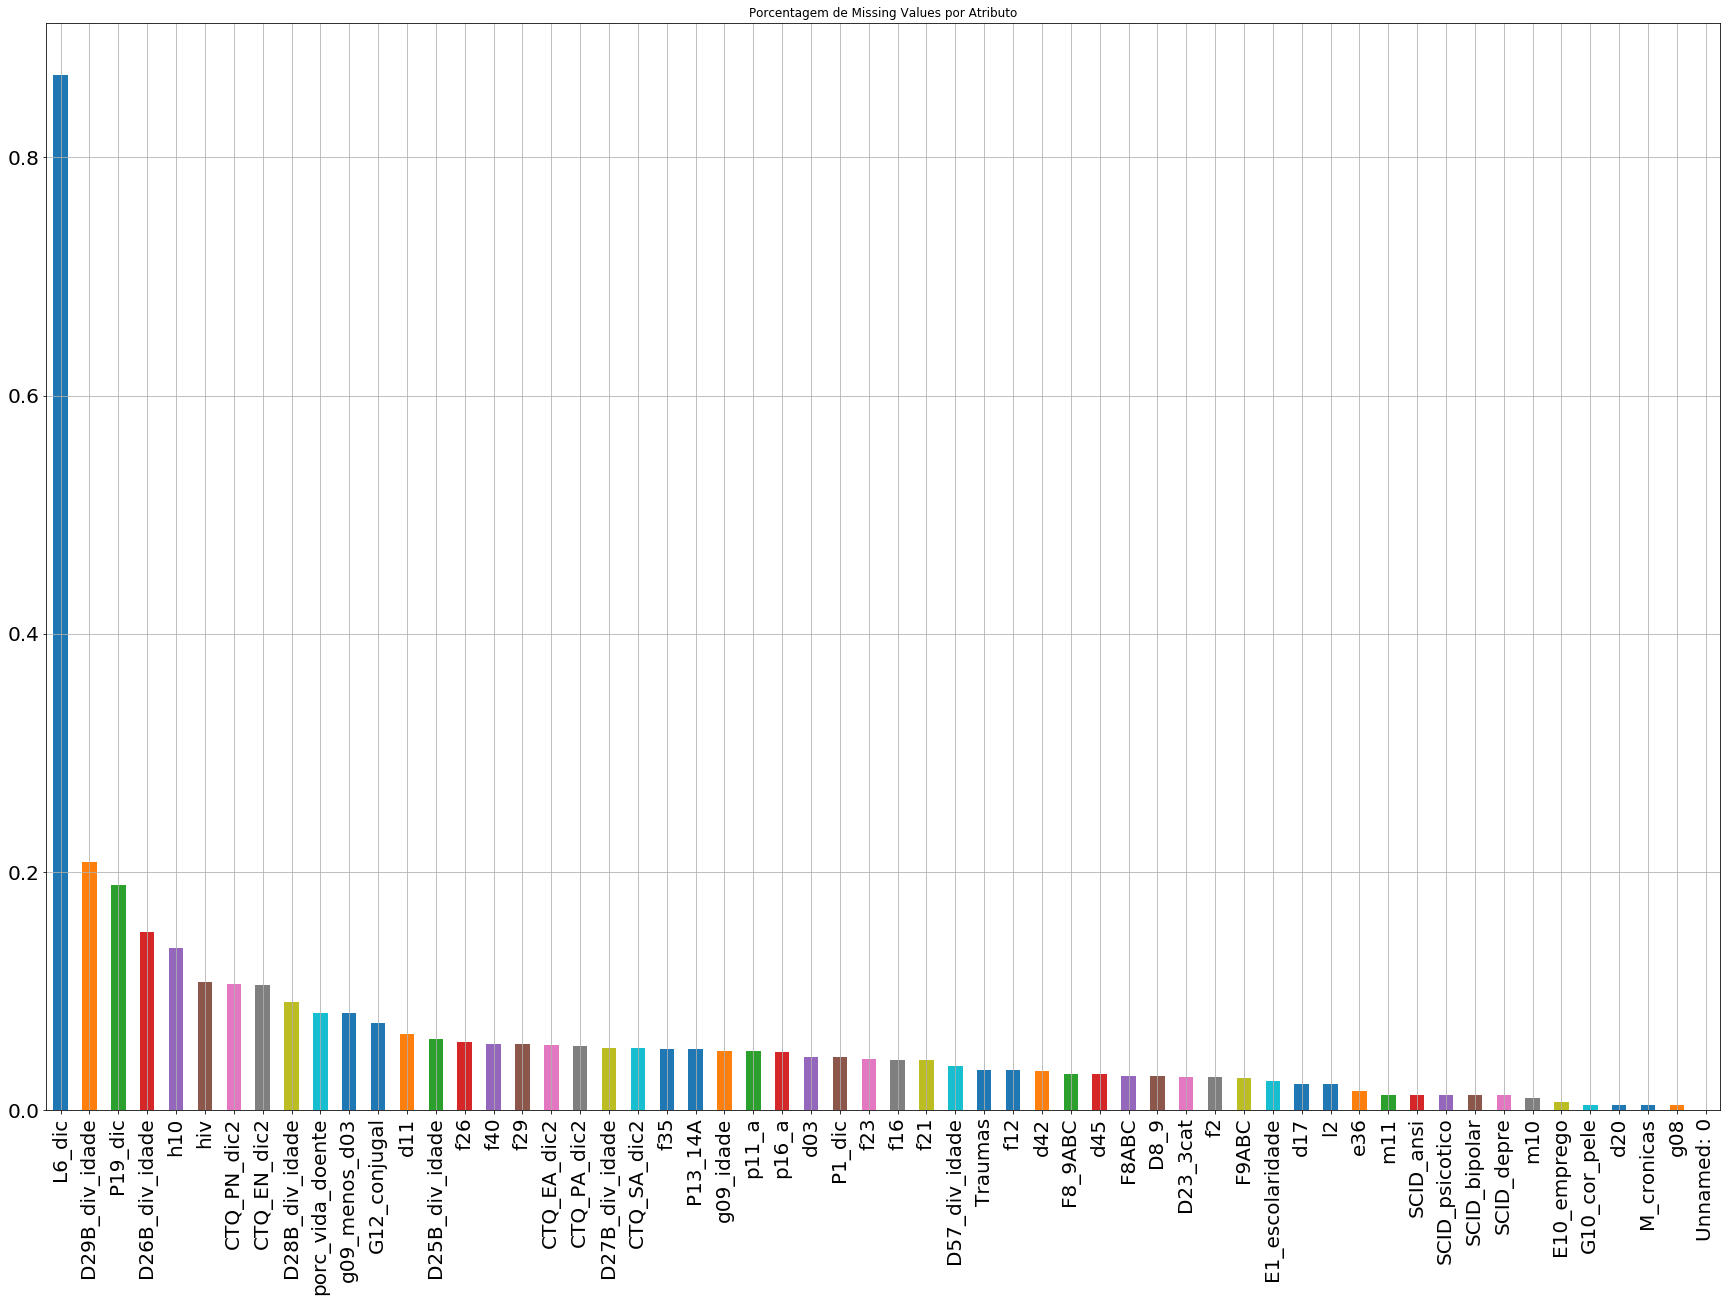

In [33]:
missingValuesColumnsPercentage.plot(kind = 'bar', 
                                    fontsize = (20), 
                                    figsize = (30,20), 
                                    title = "Porcentagem de Missing Values por Atributo",
                                    grid = True)

### Excluindo atributos
##### Regra: Excluir atributos com mais de 10% de missing value
- Atributos com mais missing values:

| Atributo | % Missing Value |                                                                                                                                                                                                              |
|-------         |-------|
|L6_dic          | 87% |
|D29B_div_idade  | 21% |
|D26B_div_idade  | 19% |
|h10             | 14% |
|hiv             | 11% |
|CTQ_PN_dic2     | 11% |
|CTQ_EN_dic2     | 11% |



In [34]:
df.drop(columns=['Unnamed: 0', 'L6_dic', 'D29B_div_idade', 'D26B_div_idade', 'h10', 'hiv', 'CTQ_PN_dic2', 'CTQ_EN_dic2'], inplace=True)

---

## Pegando a porcentagem de missing values para as Instâncias

In [35]:
missingValuesLines = df.isna().sum(axis=1)

In [36]:
missingValuesLinesPercentage = missingValuesLines/df.shape[1]

In [37]:
missingValuesLinesPercentage.sort_values(ascending=False, inplace=True)

### Excluindo atributos
##### Regra: Excluir instâncias com mais de 20% de missing value
- (Mantém na base apenas pessoas que responderam pelo menos 80% do formulário)

- Quantidade: 41/857 (4.8%)

In [38]:
len(missingValuesLinesPercentage[missingValuesLinesPercentage > 0.20])

41

In [39]:
missingValuesLinesPercentageDeleted = missingValuesLinesPercentage[missingValuesLinesPercentage > 0.20]

In [40]:
missingValuesLinesPercentageDeleted.index

Int64Index([  0,   1, 365, 366, 614,  25,  22,  20, 613, 612, 368, 611, 367,
             21,  23,  24, 597, 369, 681, 472, 470, 475,  29, 690, 370,  26,
             30,  28,  31,   2, 704, 482,  91, 478, 684, 619, 371, 202, 190,
            539,  27],
           dtype='int64')

In [41]:
df.drop(df.index[missingValuesLinesPercentageDeleted.index], inplace=True)

----

In [42]:
df['g08']

3       Feminino
4       Feminino
5       Feminino
6       Feminino
7       Feminino
8       Feminino
9       Feminino
10      Feminino
11      Feminino
12      Feminino
13      Feminino
14      Feminino
15      Feminino
16      Feminino
17      Feminino
18      Feminino
19      Feminino
32     Masculino
33     Masculino
34     Masculino
35     Masculino
36     Masculino
37     Masculino
38     Masculino
39     Masculino
40     Masculino
41     Masculino
42     Masculino
43     Masculino
44     Masculino
         ...    
827     Feminino
828     Feminino
829     Feminino
830     Feminino
831     Feminino
832     Feminino
833     Feminino
834     Feminino
835     Feminino
836     Feminino
837     Feminino
838     Feminino
839     Feminino
840     Feminino
841     Feminino
842     Feminino
843     Feminino
844     Feminino
845     Feminino
846     Feminino
847     Feminino
848     Feminino
849     Feminino
850     Feminino
851     Feminino
852     Feminino
853     Feminino
854     Femini

-----

### Gravando em um novo Database

In [43]:
df.to_csv("../../Database/201_Database.csv", index=False,)

In [44]:
df2 = pd.read_csv("../../Database/201_Database.csv")

---